In [1]:
import nest
import pylab
import numpy
import nest.voltage_trace

possible numeric stability problem in nest. follow up

[[<matplotlib.lines.Line2D at 0x7f36486689a0>]]

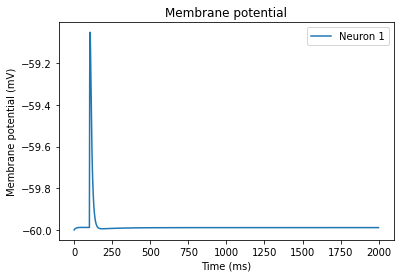

In [3]:
nest.ResetKernel()

neuron_params_thl = { 
        #'model' : "aeif_cond_exp",
        'E_L': -60.,  # resting membrane potential (mV) - see refs
        'V_m' : -60,
        'C_m': 50.0,      # membrane capacity (pF)
        'g_L': 5.0,      # leak conductance  - see refs
        'V_reset': -52.,  # reset membrane potential after a spike (mV)  - for bustiness
        'V_th': -50.,  # spike threshold (mV)
        'tau_syn_ex': 2.5, # exc. synaptic time constant  - mit paper
        'tau_syn_in': 10., # exc. synaptic time constant  - mit paper

        # initial burst + adaptation
        "a": 0.5,
        "b": 10.,
        'tau_w': 150.,
    }

n = nest.Create("aeif_cond_exp", 1)
nest.SetStatus(n, neuron_params_thl)

v = nest.Create("voltmeter")

nest.Connect(v, n)

sg = nest.Create('spike_generator')

nest.SetStatus(sg, {'spike_times' : [100.]})

nest.Connect(sg, n, syn_spec={'weight':.5})

nest.Simulate(2000)

nest.voltage_trace.from_device(v)

[[<matplotlib.lines.Line2D at 0x7f49344aed60>]]

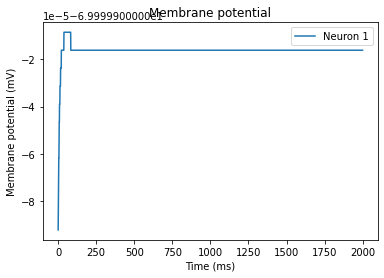

In [47]:
nest.ResetKernel()

neuron_params_thl = { 
        #'model' : "aeif_cond_exp",
        'E_L': -70.,  # resting membrane potential (mV) - see refs
        'V_m' : -70,
        'C_m': 50.0,      # membrane capacity (pF)
        'g_L': 5.0,      # leak conductance  - see refs
        'V_reset': -52.,  # reset membrane potential after a spike (mV)  - for bustiness
        'V_th': -50.,  # spike threshold (mV)
        'tau_syn_ex': 2.5, # exc. synaptic time constant  - mit paper
        'tau_syn_in': 10., # exc. synaptic time constant  - mit paper

        # initial burst + adaptation
        "a": 0.5,
        "b": 10.,
        'tau_w': 150.,
    }

n = nest.Create("aeif_cond_exp", 1)
nest.SetStatus(n, neuron_params_thl)

v = nest.Create("voltmeter")

nest.Connect(v, n)

sg = nest.Create('spike_generator')

nest.SetStatus(sg, {'spike_times' : [100.]})

#nest.Connect(sg, n, syn_spec={'weight':.01})

nest.Simulate(2000)

nest.voltage_trace.from_device(v)